# QR Decomposition
- $A = Q R$
- $A$ is original matrix
- $Q$ is orthogonal matrix
- $R$ is residual matrix, which contains the information loss happened by creating orthogonal matrix from original matrix.
- To compute $R$, $Q^T A = R$

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
A = [
    [1, 0],
    [1, 0],
    [0, 1]
]
print('A')
print(np.array(A).shape)
print(np.round(A, 2))
print()

# Full QR decomposition
Q, R = np.linalg.qr(A, 'complete')
print('Q by full QR decomposition')
print(Q.shape)
print(np.round(Q, 2))
print()

print('R')
print(R.shape)
print(np.round(R, 2))
print()

# Economy (chop off columns from Q which do not exist in A)
Q, R = np.linalg.qr(A)
print('Q by economy QR decomposition')
print(Q.shape)
print(np.round(Q, 2))
print()

A
(3, 2)
[[1 0]
 [1 0]
 [0 1]]

Q by full QR decomposition
(3, 3)
[[-0.71  0.    0.71]
 [-0.71  0.   -0.71]
 [-0.   -1.    0.  ]]

R
(3, 2)
[[-1.41  0.  ]
 [ 0.   -1.  ]
 [ 0.    0.  ]]

Q by economy QR decomposition
(3, 2)
[[-0.71  0.  ]
 [-0.71  0.  ]
 [-0.   -1.  ]]



## Visualize QR decomposition

R from numpy QR decomposition
[[-3.16  0.63 -0.32]
 [ 0.   -1.26  2.21]]

R from Q^T M
[[-3.16  0.63 -0.32]
 [ 0.   -1.26  2.21]]



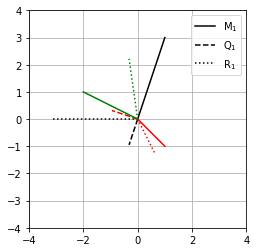

Black line: 1st column of M
Red line: 2nd column of M
Green line: 3rd column of M
Q does not have 3rd vector because of loss of information


In [19]:
M = np.array([
    [1, 1, -2],
    [3, -1, 1]
])

Q, R = np.linalg.qr(M, 'complete')

print('R from numpy QR decomposition')
print(np.round(R, 2))
print()

print('R from Q^T M')
print(np.round(Q.T @ M, 2))
print()

colorz = 'krg'

for i in range(np.shape(M)[1]):
    
    # Plot original vector M
    plt.plot([0, M[0, i]], [0, M[1, i]], colorz[i])
    
    # Plot orthogonalized vector Q
    if i < np.shape(Q)[1]:
        plt.plot([0, Q[0, i]], [0, Q[1, i]], colorz[i], linestyle='--')
        
    # Plot residual vector R
    plt.plot([0, R[0, i]], [0, R[1, i]], colorz[i], linestyle=':')
    
plt.legend(['M$_1$', 'Q$_1$', 'R$_1$'])
plt.axis('square')
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.grid()
plt.show()

print('Black line: 1st column of M')
print('Red line: 2nd column of M')
print('Green line: 3rd column of M')
print('Q does not have 3rd vector because of loss of information')

## Matrix inverse via QR decomposition

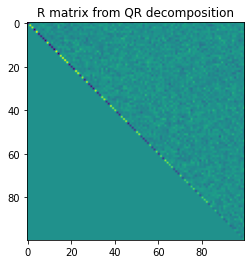

R
(100, 100)
[[-10.4  -0.9   0.1 ...   0.3   0.3  -0.6]
 [  0.    9.3  -0.8 ...   0.5   2.1   0.4]
 [  0.    0.    8.7 ...  -0.7   0.5   0. ]
 ...
 [  0.    0.    0.  ...   1.5  -0.7  -0.8]
 [  0.    0.    0.  ...   0.   -2.3   0.6]
 [  0.    0.    0.  ...   0.    0.    1.7]]


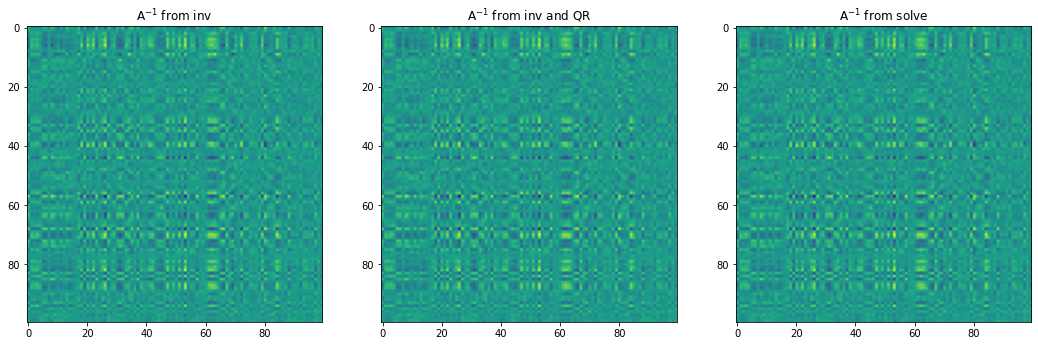

Compute correlation matrix to confirm numerically they are the same
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


In [17]:
m = 100
A = np.random.randn(m, m)

# Inverse a matrix by inverse function
Ai = np.linalg.inv(A)

# Get Q and R matrinx from QR decomposition
Q, R = np.linalg.qr(A)

# Check R is an upper-triangular matrix
plt.imshow(R)
plt.title('R matrix from QR decomposition')
plt.show()
print('R')
print(R.shape)
print(np.round(R, 1))

# Inverse a matrix by using math with Q and R
AiQR1 = np.linalg.inv(R) @ Q.T

# Inverse a matrix by using more stable solve function
AiQR2 = np.linalg.solve(R, Q.T)

plt.figure(figsize=(18, 18))

plt.subplot(1, 3, 1)
plt.imshow(Ai)
plt.title('A$^{-1}$ from inv')

plt.subplot(1, 3, 2)
plt.imshow(AiQR1)
plt.title('A$^{-1}$ from inv and QR')

plt.subplot(1, 3, 3)
plt.imshow(AiQR2)
plt.title('A$^{-1}$ from solve')

plt.show()

print('Compute correlation matrix to confirm numerically they are the same')
print(np.corrcoef((
    Ai.flatten(),
    AiQR1.flatten(),
    AiQR2.flatten()
)))

## $A^T A = R^T R$ ($R$ from QR decomposition)

By applying QR decomposition to a given matrix $A$

$$
A = Q R
$$

By substituting $Q R$ into $A ^T A$,

$$
A^T A = (Q R)^T Q R
$$

By **LIVE EVIL rule**,

$$
= R^T Q^T Q R
$$

Because $Q$ is an orthogonal matrix, $Q^T = Q^{-1}$, and $Q^{-1} Q = I$.

$$
= R^T I R
$$
$$
A^T A = R^T R
$$

In [4]:
m = 10
n = 4
A = np.random.randn(m, n)

Q, R = np.linalg.qr(A)

print('A^T A - R^T R')
print(np.round(A.T @ A - R.T @ R, 1))

A^T A - R^T R
[[-0. -0.  0. -0.]
 [-0.  0.  0.  0.]
 [ 0.  0. -0.  0.]
 [-0.  0.  0. -0.]]
